#### Linear Regression
##### get the best straight line relationship about points of data 
##### Best line is found my mimimizing the distance bewtween the two lines. The "best fit" is the one where
##### the sum of the squares of the lengths of the errors is minimized.
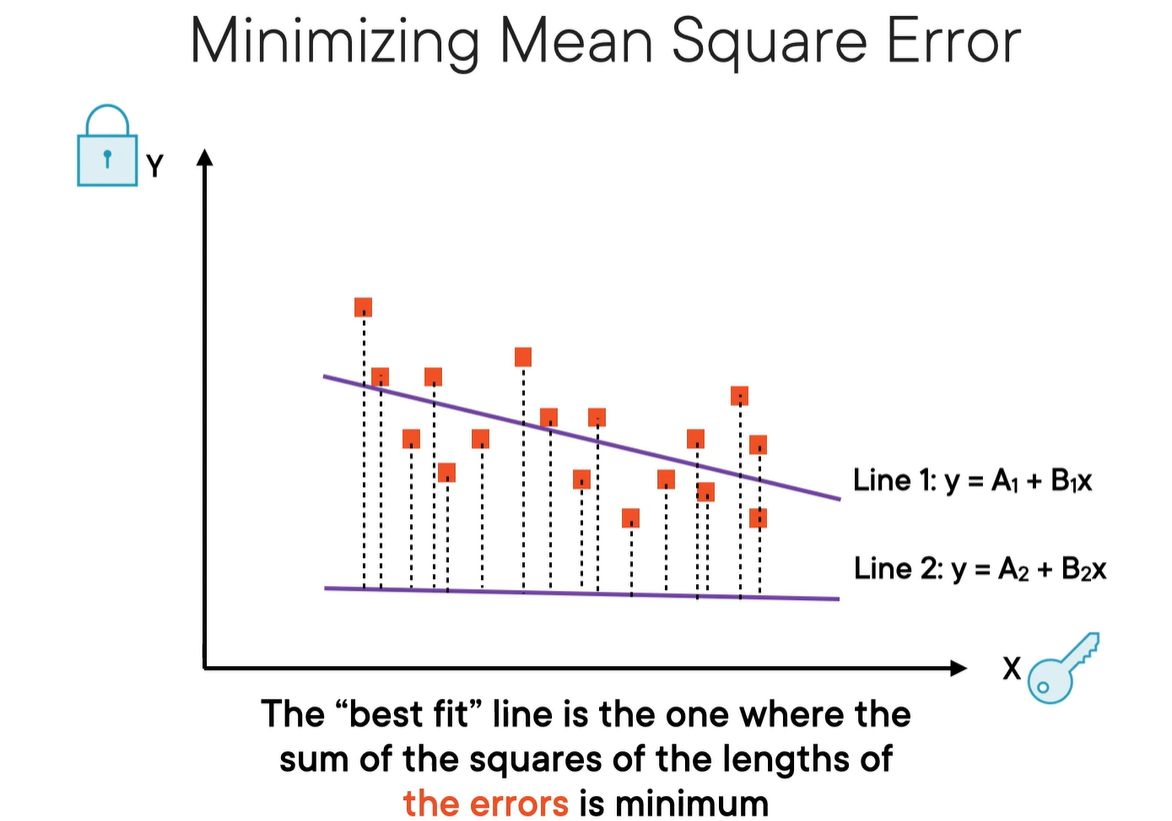

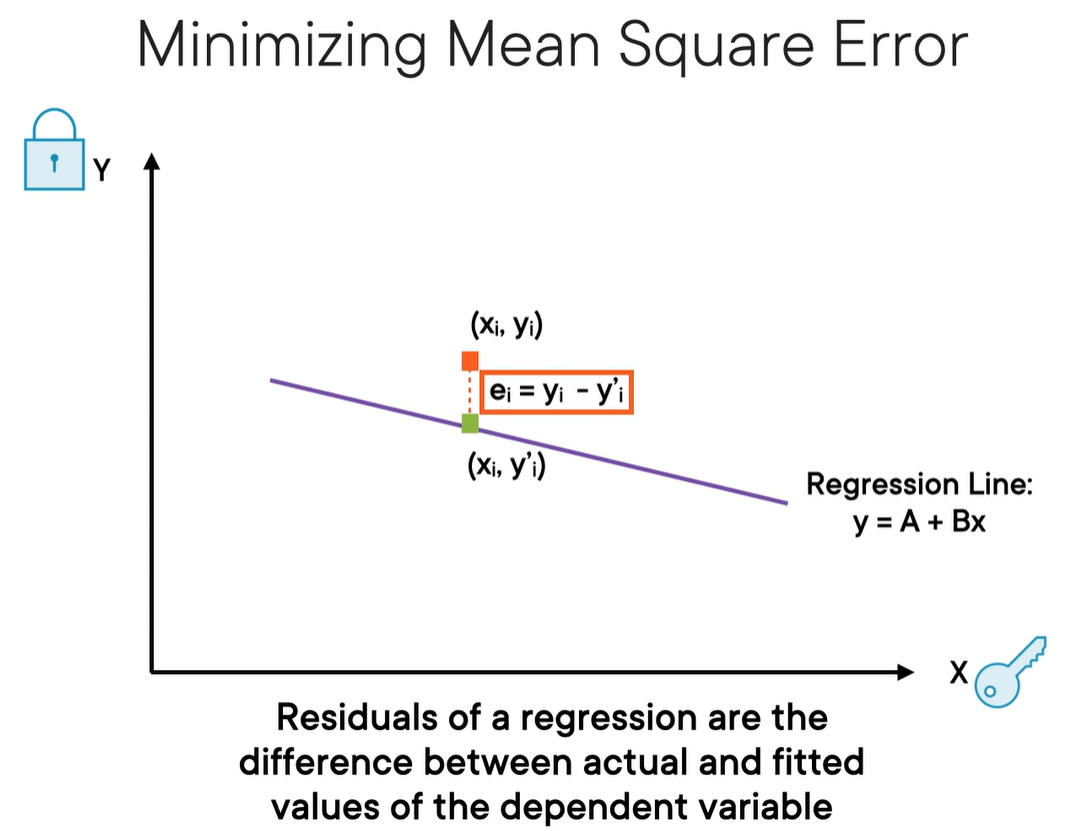

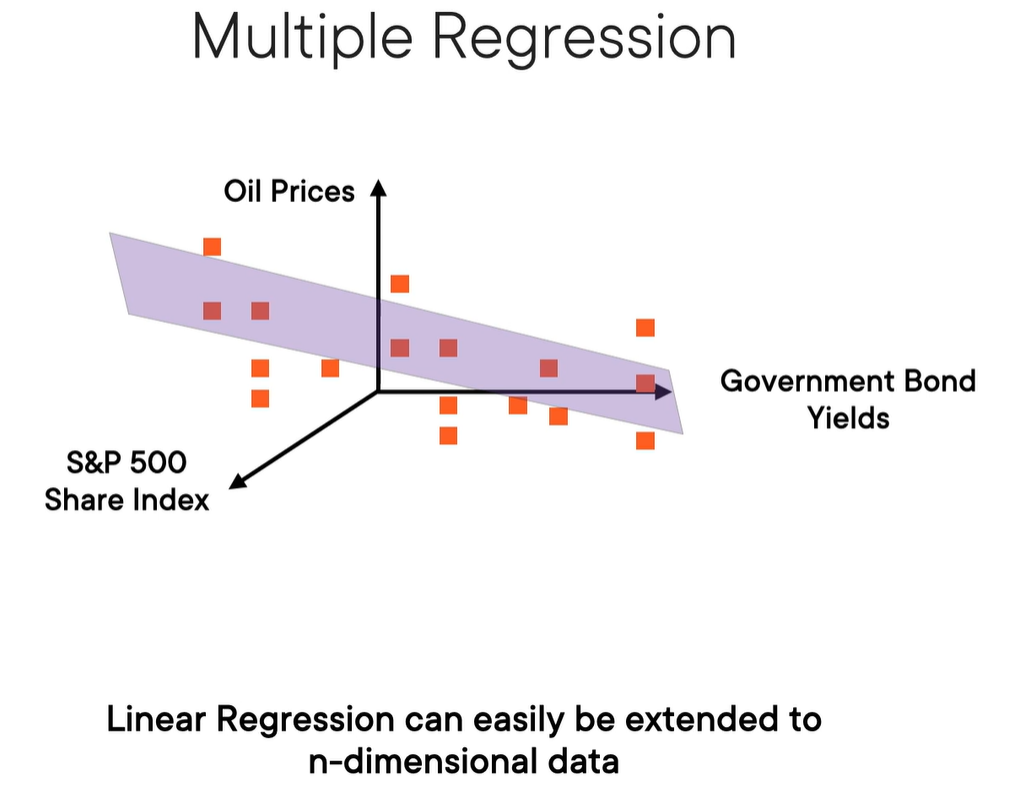

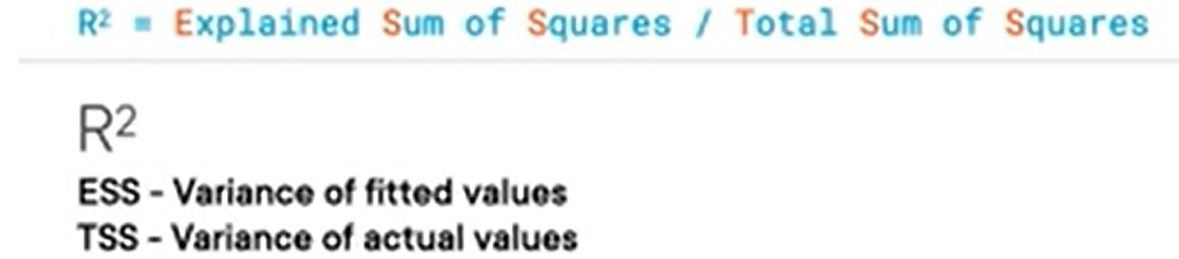

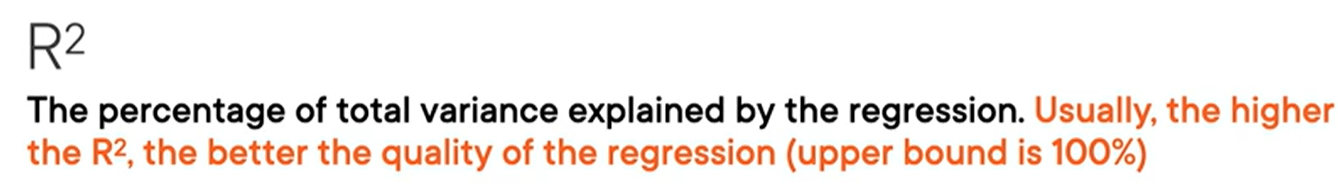


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [2]:
car_data = pd.read_csv("C:/Projects/learning/datasets/pl-foundations-statistics-probability-machine-learning/CarPrice_Assignment.csv")
car_data.head()         

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


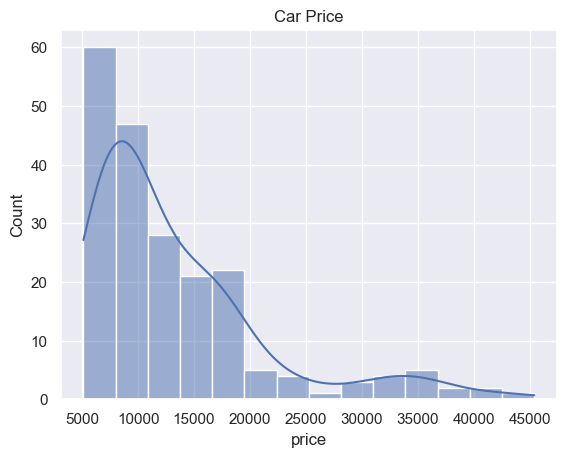

In [3]:
# explore distribution of car price
plt.Figure(figsize=(12,8))
sns.histplot(data=car_data, x='price', kde=True)
plt.title('Car Price')
plt.show()

Text(0.5, 1.0, 'Car Price by Fuel Type')

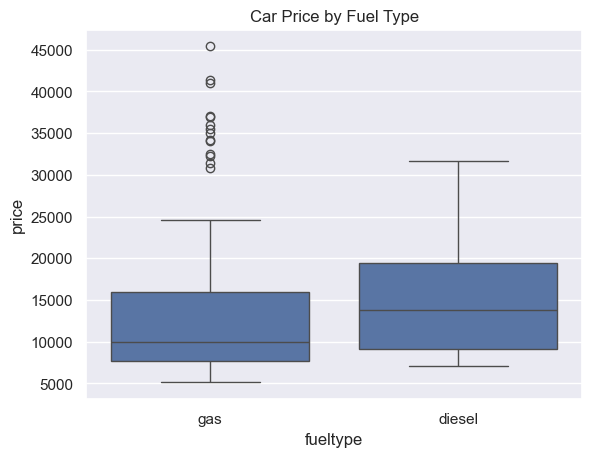

In [4]:
# is the price of a car impacted by fuel type?
plt.Figure(figsize=(12,8))
sns.boxplot(data=car_data, x='fueltype', y='price')
plt.title('Car Price by Fuel Type')

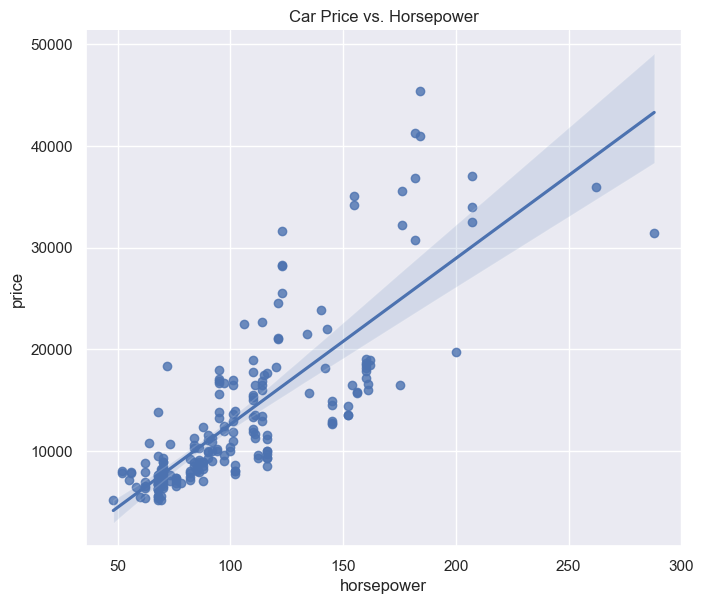

In [7]:
sns.lmplot(data=car_data, x='horsepower', y='price', height=6, aspect=1.2)
plt.title('Car Price vs. Horsepower')
plt.show()

In [8]:
# shuffle the data so the algorithm does not pickup any patterns in the data
car_data = car_data.sample(frac=1).reset_index(drop=True)
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,60,1,mazda 626,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,8845.0
1,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.350,8.0,184,4500,14,16,45400.0
2,58,3,mazda rx-7 gs,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,13645.0
3,35,1,honda civic cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.410,9.2,76,6000,30,34,7129.0
4,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.350,22.5,56,4500,34,36,7898.0


In [10]:
x = car_data['horsepower']
y = car_data['price']

# add constant to X to for the y axis intercept
import statsmodels.api as sm
x = sm.add_constant(x)
x.head()

,const,horsepower
0,1.0,84
1,1.0,184
2,1.0,101
3,1.0,76
4,1.0,56


In [11]:
# 80% dof data is train data
train_size = int(0.8 * len(x))

x_train_set = x[:train_size]
y_train_set = y[:train_size]

x_test_set = x[train_size:]
y_test_set = y[train_size:]

In [12]:
# original data has approx 200 records
x_train_set.shape, x_test_set.shape

((164, 2), (41, 2))

In [13]:
y_train_set.shape, y_test_set.shape

((164,), (41,))

In [14]:
model = sm.OLS(y_train_set, x_train_set).fit()
model

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     331.8
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           4.76e-41
Time:                        02:03:57   Log-Likelihood:                -1610.6
No. Observations:                 164   AIC:                             3225.
Df Residuals:                     162   BIC:                             3231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5389.6450   1056.245     -5.103      0.000   -7475.428   -3303.862
horsepower   181.1101      9.943     18.214      0.000     161.475     200.746
==============================================================================
Omnibus:                       28.450   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.413
Skew:                           0.864   Prob(JB):                     3.07e-11
Kurtosis:                       5.024   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

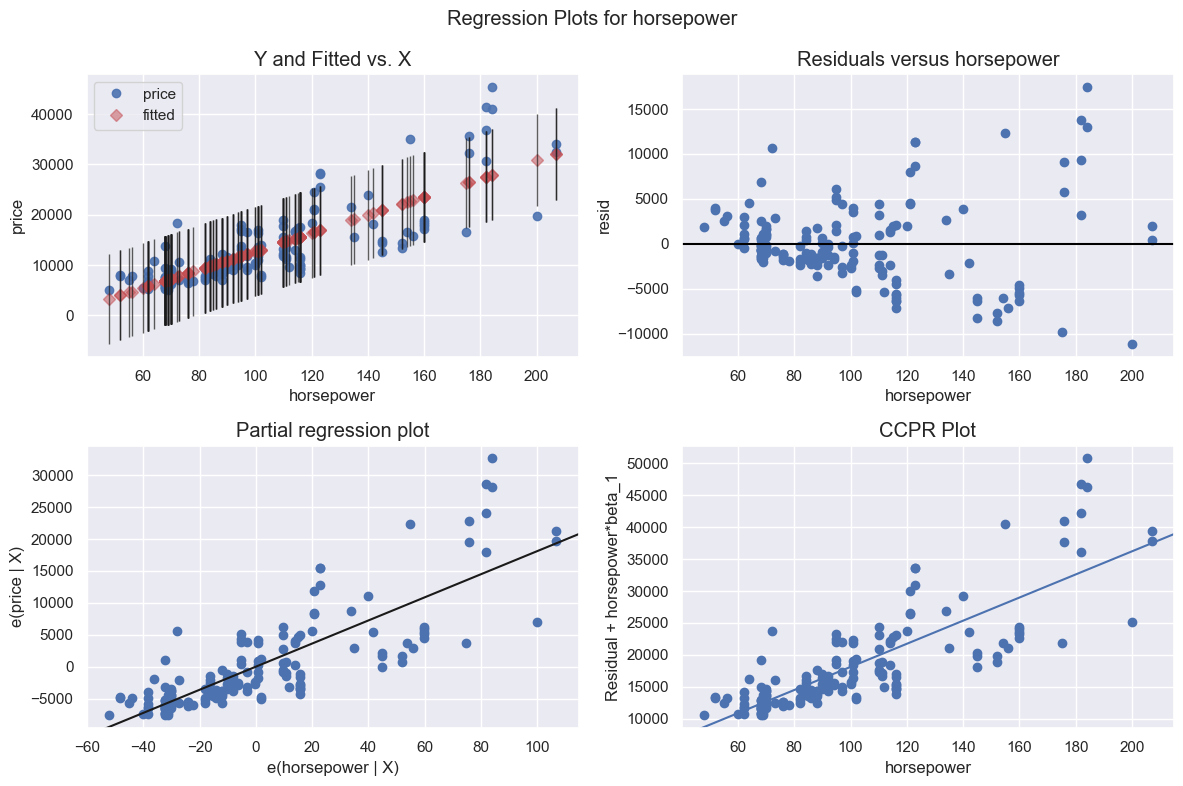

In [16]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'horsepower', fig=fig)

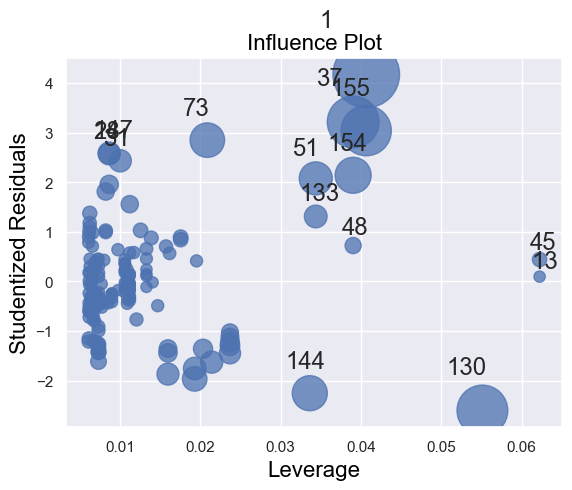

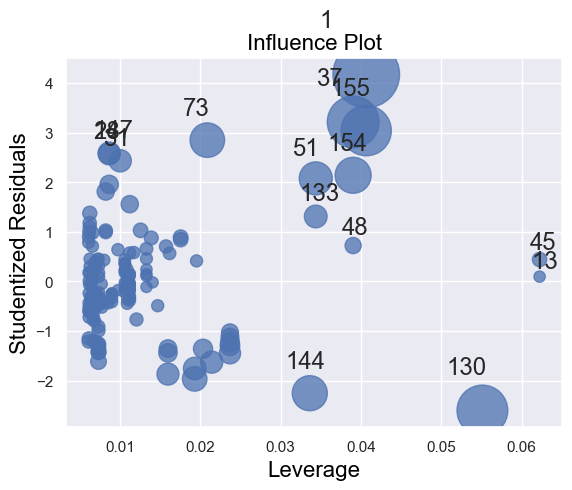

In [17]:
sm.graphics.influence_plot(model)

In [18]:
y_pred = model.predict(x_test_set)
y_pred.head()

164    32100.148635
165    12178.036077
166    13083.586648
167    23769.083383
168    46770.067882
dtype: float64

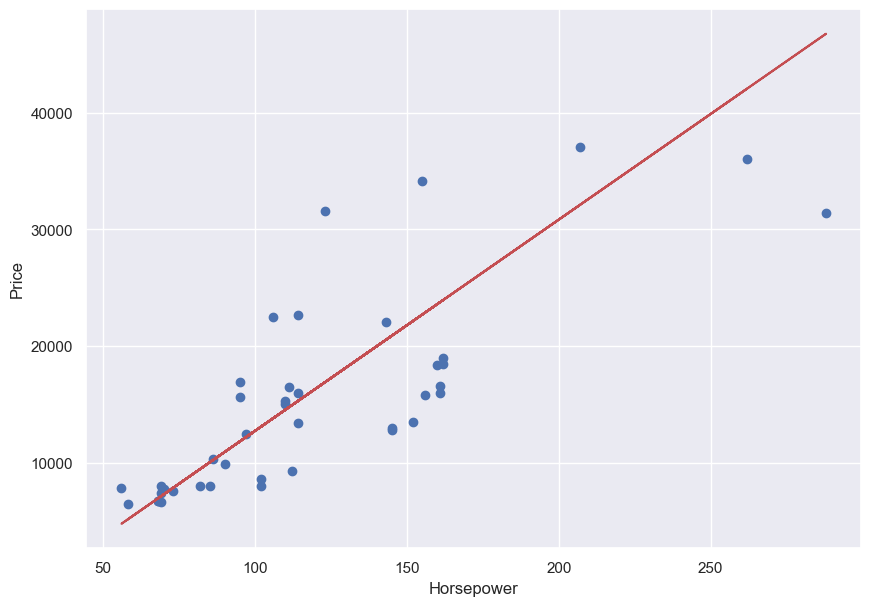

In [20]:
# vizualization how predicted data fits test data
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(x_test_set['horsepower'], y_test_set)
plt.plot(x_test_set['horsepower'], y_pred, color='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()


In [21]:
from sklearn.metrics import r2_score

r2_score(y_test_set, y_pred)

0.5245400602728434